In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle

In [2]:
import os
list_csv = sorted(os.listdir("/content/drive/MyDrive/MutualFunds"))

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MutualFunds/Aditya_Birla_Sun_Life_Banking_and_Financial_Services_Fund_-_Direct_Plan_-_Dividend.csv")
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Scheme Code', 'Scheme Name',
       'ISIN Div Payout/ISIN Growth', 'ISIN Div Reinvestment',
       'Net Asset Value', 'Repurchase Price', 'Sale Price', 'Date'],
      dtype='object')

In [3]:
mf_data = []

for csv in list_csv:
  path = "/content/drive/MyDrive/MutualFunds/"+csv
  df = pd.read_csv(path)
  df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

  
  df = df.rename(columns = {'Sale Price':'Sale_Price'})
  df = df.rename(columns = {'Net Asset Value':'NAV'})
  df = df.rename(columns = {'Repurchase Price':'RP'})

  df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
  df = df.set_index("Date", drop=False)
  df.reset_index(drop=True, inplace=True)

  df = df[df.Date <= "2018-06-29"]

  # print(df.dtypes)
  
  df['RP'] = df['RP'].astype("float")
  df['NAV'] = df['NAV'].astype("float")
  df['Sale_Price'] = df['Sale_Price'].astype("float")
  df.fillna(df.mean(),inplace=True)

  mf_data.append(df)

<ipython-input-3-722af8340bb6>:24: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(),inplace=True)
<ipython-input-3-722af8340bb6>:24: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(),inplace=True)
<ipython-input-3-722af8340bb6>:24: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(),inplace=True)
<ipython-input-3-722af8340bb6>:24: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. 

In [4]:
print(mf_data[0].head())

   Scheme Code                                        Scheme Name  \
0       125598  Aditya Birla Sun Life Banking and Financial Se...   
1       125598  Aditya Birla Sun Life Banking and Financial Se...   
2       125598  Aditya Birla Sun Life Banking and Financial Se...   
3       125598  Aditya Birla Sun Life Banking and Financial Se...   
4       125598  Aditya Birla Sun Life Banking and Financial Se...   

  ISIN Div Payout/ISIN Growth ISIN Div Reinvestment    NAV     RP  Sale_Price  \
0                INF209K013W3          INF209K015W8  14.22  13.94       14.22   
1                INF209K013W3          INF209K015W8  14.43  14.14       14.43   
2                INF209K013W3          INF209K015W8  14.41  14.12       14.41   
3                INF209K013W3          INF209K015W8  13.97  13.69       13.97   
4                INF209K013W3          INF209K015W8  13.97  13.69       13.97   

        Date  
0 2015-01-01  
1 2015-01-02  
2 2015-01-05  
3 2015-01-06  
4 2015-01-07  


In [5]:
avg_mf = []
cols = ['NAV', 'RP','Sale_Price']
for each_stock in mf_data:
    # avg_df = pd.Dataframe()
    
    each_stock = each_stock.drop(['Scheme Code', 'Scheme Name',
       'ISIN Div Payout/ISIN Growth', 'ISIN Div Reinvestment','Date'], axis =1)

    nav_avg = each_stock.loc[:, 'NAV'].mean()
    rp_avg = each_stock.loc[:, 'RP'].mean()
    sp_avg = each_stock.loc[:, 'Sale_Price'].mean()

    data = {'NAV':[nav_avg],'RP':[rp_avg],'Sale_Price':[sp_avg]}
    df = pd.DataFrame(data)

    avg_mf.append(df)

In [6]:
print(avg_mf[20].head())

         NAV         RP  Sale_Price
0  23.232383  23.000059   23.232383


In [7]:
combined_avg_csv = pd.DataFrame(columns = ['NAV', 'RP','Sale_Price'])

for stock in avg_mf:
  combined_avg_csv = pd.concat([combined_avg_csv,stock],axis=0)

print(combined_avg_csv.head())
print(combined_avg_csv.shape[0])

         NAV         RP  Sale_Price
0  18.229977  18.007497   18.229977
0  21.870475  21.604021   21.870475
0  15.914519  15.715655   15.914519
0  21.275249  21.015643   21.275249
0  17.483708  17.309003   17.483708
24


In [9]:
from sklearn.preprocessing import MinMaxScaler

# scale features
scaler = MinMaxScaler()
scaler.fit(combined_avg_csv[['NAV']])
combined_avg_csv['NAV'] = scaler.transform(combined_avg_csv[['NAV']])

scaler.fit(combined_avg_csv[['RP']])
combined_avg_csv['RP'] = scaler.transform(combined_avg_csv[['RP']])

scaler.fit(combined_avg_csv[['Sale_Price']])
combined_avg_csv['Sale_Price'] = scaler.transform(combined_avg_csv[['Sale_Price']])

combined_avg_csv.head()

,NAV,RP,Sale_Price
0,0.039109,0.037345,0.039109
0,0.067975,0.065863,0.067975
0,0.020750,0.019173,0.020750
0,0.063256,0.061197,0.063256
0,0.033192,0.031807,0.033192


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 1 	Average Distortion: 0.32641637978774257
Number of Clusters: 2 	Average Distortion: 0.08335941855296108


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 3 	Average Distortion: 0.06359481555933506


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 4 	Average Distortion: 0.04079837126720541
Number of Clusters: 5 	Average Distortion: 0.024686519540576282


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 6 	Average Distortion: 0.01938364681557646
Number of Clusters: 7 	Average Distortion: 0.013450767742090046


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 8 	Average Distortion: 0.01034397086832361


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

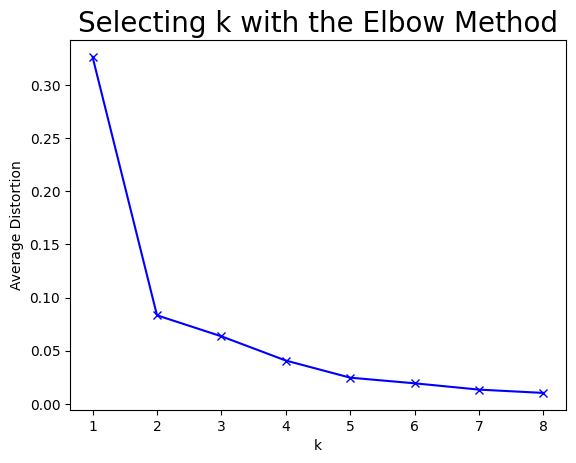

In [10]:
# Import necessary libraries
# from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(combined_avg_csv)
    prediction=model.predict(combined_avg_csv)
    distortion=sum(np.min(cdist(combined_avg_csv, model.cluster_centers_, 'euclidean'), axis=1)) / combined_avg_csv.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

In [11]:
# checking silhoutte score
from sklearn.metrics import silhouette_score
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((combined_avg_csv))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(combined_avg_csv, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.8646543792741509)
For n_clusters = 3, silhouette score is 0.810915499227877)
For n_clusters = 4, silhouette score is 0.8153356922908959)
For n_clusters = 5, silhouette score is 0.5636824485363109)
For n_clusters = 6, silhouette score is 0.5322209760264492)
For n_clusters = 7, silhouette score is 0.5082788421528827)
For n_clusters = 8, silhouette score is 0.5054350369539585)
For n_clusters = 9, silhouette score is 0.43452549039474636)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

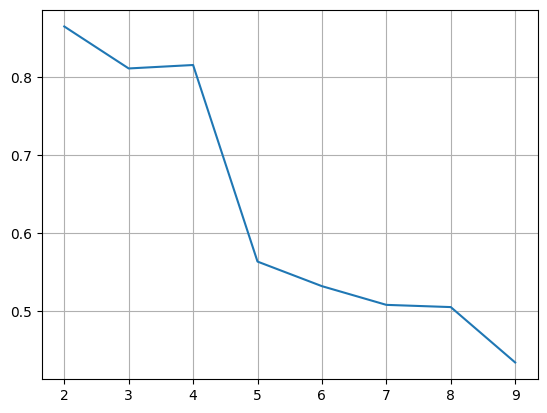

In [12]:
plt.plot(cluster_list,sil_score)
plt.grid()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


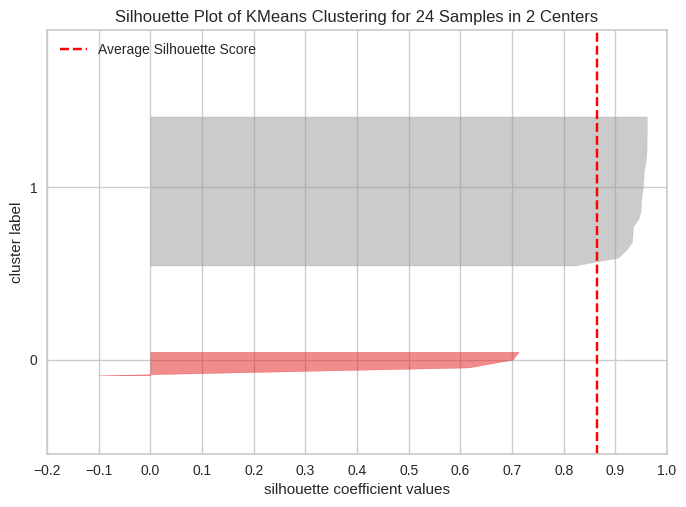

In [13]:
# Finding optimal no. of clusters with silhouette coefficients
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(2, random_state = 1))
visualizer.fit(combined_avg_csv)    
visualizer.show();

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


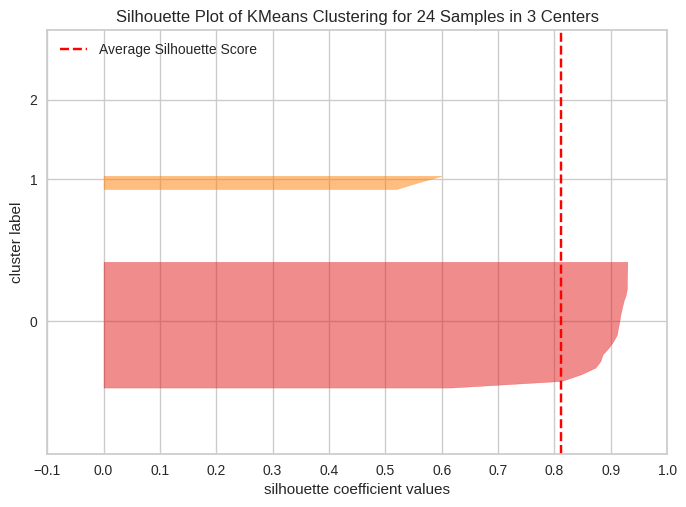

In [14]:
# Finding optimal no. of clusters with silhouette coefficients
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(combined_avg_csv)    
visualizer.show();

In [15]:
# Choosing k=4 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(combined_avg_csv)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [16]:
print(kmeans.labels_)


[0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 1 0 0 0 1]


In [17]:
# df['K_means_segments'] = kmeans.labels_
combined_avg_csv['K_means_segments'] = kmeans.labels_

In [18]:
combined_avg_csv.head()

,NAV,RP,Sale_Price,K_means_segments
0,0.039109,0.037345,0.039109,0
0,0.067975,0.065863,0.067975,0
0,0.020750,0.019173,0.020750,0
0,0.063256,0.061197,0.063256,0
0,0.033192,0.031807,0.033192,0


In [19]:
data = {0:[],1:[],2:[]}
index = 0
for label in combined_avg_csv['K_means_segments']:
  data[int(label)].append(list_csv[index])
  index = index+1
print(data)

{0: ['Aditya_Birla_Sun_Life_Banking_and_Financial_Services_Fund_-_Direct_Plan_-_Dividend.csv', 'Aditya_Birla_Sun_Life_Banking_and_Financial_Services_Fund_-_Direct_Plan_-_Growth.csv', 'Aditya_Birla_Sun_Life_Banking_and_Financial_Services_Fund_-_Regular_Plan_-_Dividend.csv', 'Aditya_Birla_Sun_Life_Banking_and_Financial_Services_Fund_-_Regular_Plan_-_Growth.csv', 'Baroda_Banking_And_Financial_Services_Fund_-_Plan_A_-_Bonus_Option.csv', 'Baroda_Banking_and_Financial_Services_Fund_-_Plan_A_-_Dividend.csv', 'Baroda_Banking_and_Financial_Services_Fund_-_Plan_A_-_Growth_Option.csv', 'HDFC_Focused_30_Fund_-Direct_Plan_-_Dividend_Option.csv', 'HDFC_Focused_30_Fund_-_DIVIDEND.csv', 'ICICI_Prudential_Focused_Equity_Fund_-_Direct_Plan_-_Dividend.csv', 'ICICI_Prudential_Focused_Equity_Fund_-_Direct_Plan_-_Growth.csv', 'ICICI_Prudential_Focused_Equity_Fund_-_Dividend.csv', 'Motilal_Oswal_Focused_25_Fund_(MOF25)-_Direct_Plan_Growth_Option.csv', 'Motilal_Oswal_Focused_25_Fund_(MOF25)-_Regular_Plan_Grow

In [20]:
print("Cluster 1 ;- ",data[0])
print("Cluster 2 ;- ",data[1])
print("Cluster 3 ;- ",data[2])

Cluster 1 ;-  ['Aditya_Birla_Sun_Life_Banking_and_Financial_Services_Fund_-_Direct_Plan_-_Dividend.csv', 'Aditya_Birla_Sun_Life_Banking_and_Financial_Services_Fund_-_Direct_Plan_-_Growth.csv', 'Aditya_Birla_Sun_Life_Banking_and_Financial_Services_Fund_-_Regular_Plan_-_Dividend.csv', 'Aditya_Birla_Sun_Life_Banking_and_Financial_Services_Fund_-_Regular_Plan_-_Growth.csv', 'Baroda_Banking_And_Financial_Services_Fund_-_Plan_A_-_Bonus_Option.csv', 'Baroda_Banking_and_Financial_Services_Fund_-_Plan_A_-_Dividend.csv', 'Baroda_Banking_and_Financial_Services_Fund_-_Plan_A_-_Growth_Option.csv', 'HDFC_Focused_30_Fund_-Direct_Plan_-_Dividend_Option.csv', 'HDFC_Focused_30_Fund_-_DIVIDEND.csv', 'ICICI_Prudential_Focused_Equity_Fund_-_Direct_Plan_-_Dividend.csv', 'ICICI_Prudential_Focused_Equity_Fund_-_Direct_Plan_-_Growth.csv', 'ICICI_Prudential_Focused_Equity_Fund_-_Dividend.csv', 'Motilal_Oswal_Focused_25_Fund_(MOF25)-_Direct_Plan_Growth_Option.csv', 'Motilal_Oswal_Focused_25_Fund_(MOF25)-_Regular